# Emotion and Reason in Political Language: Examining the UN General speeches
## Script 2: Descriptives
### by Sarah Franzen

### Description: 
#### -

## Descriptive Plots

In [78]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import joblib
import pandas as pd
from wordcloud import WordCloud

# === Set Working Directory ===

# Set your working directory (adjust this as needed)
wd = r"C:\Users\sarah\OneDrive\Dokumente\Masterarbeit"
os.chdir(wd)

# === Define Folder Paths ===

# Make sure that you have these folders in your working directory
data_c = os.path.join(wd, 'data')
data_temp = os.path.join(data_c, 'temp')
data_freq = os.path.join(data_c, 'freq')
fig_dir = os.path.join(wd, 'fig')

word_counts_stemmed = joblib.load(os.path.join(data_freq, 'word_counts_stemmed.pkl'))
word_counts_wordcloud = joblib.load(os.path.join(data_freq, 'word_counts_wordcloud.pkl'))

df_merged = pd.read_pickle(os.path.join(data_c, "un_corpus_merged.pkl"))

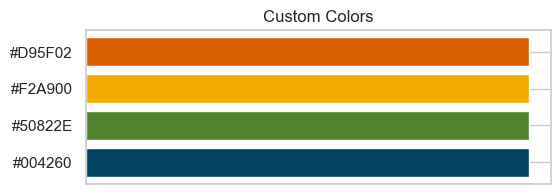

In [79]:
# Create custom palette

custom_colors = ['#004260', '#50822E', '#F2A900', '#D95F02']
custom_cmap = ListedColormap(custom_colors)


# Plot the individual colors as horizontal bars
plt.figure(figsize=(6, 2))
for i, color in enumerate(custom_colors):
    plt.barh(y=i, width=1, color=color)
plt.yticks(range(len(custom_colors)), custom_colors)
plt.xticks([])
plt.title("Custom Colors")
plt.show()


### Graphs 1 &2 : Quantity of speeches by country

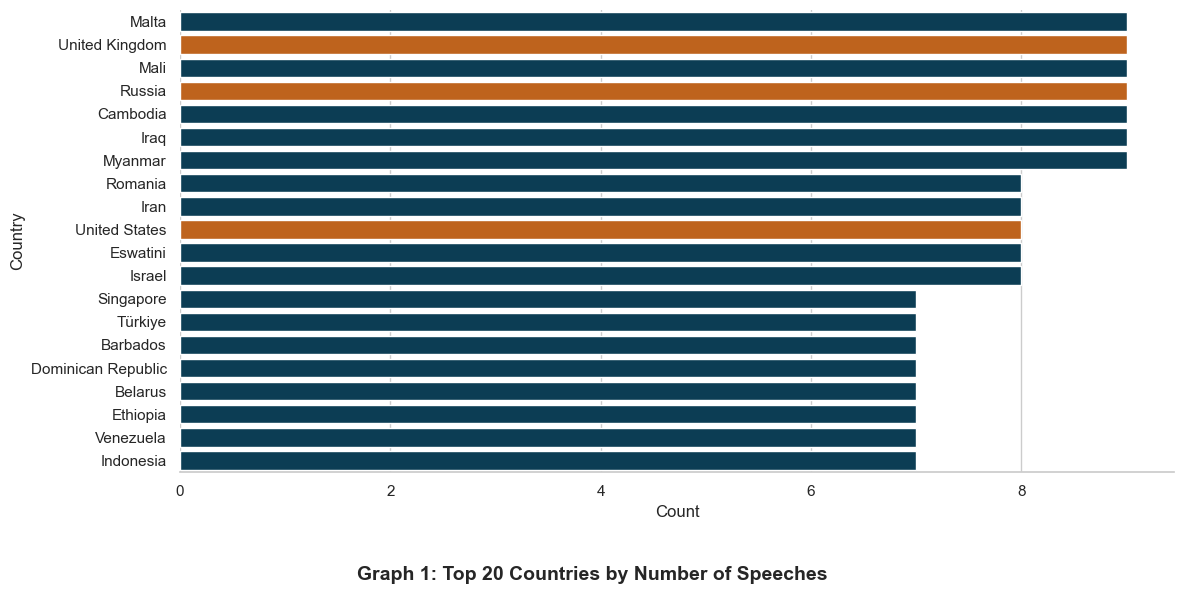

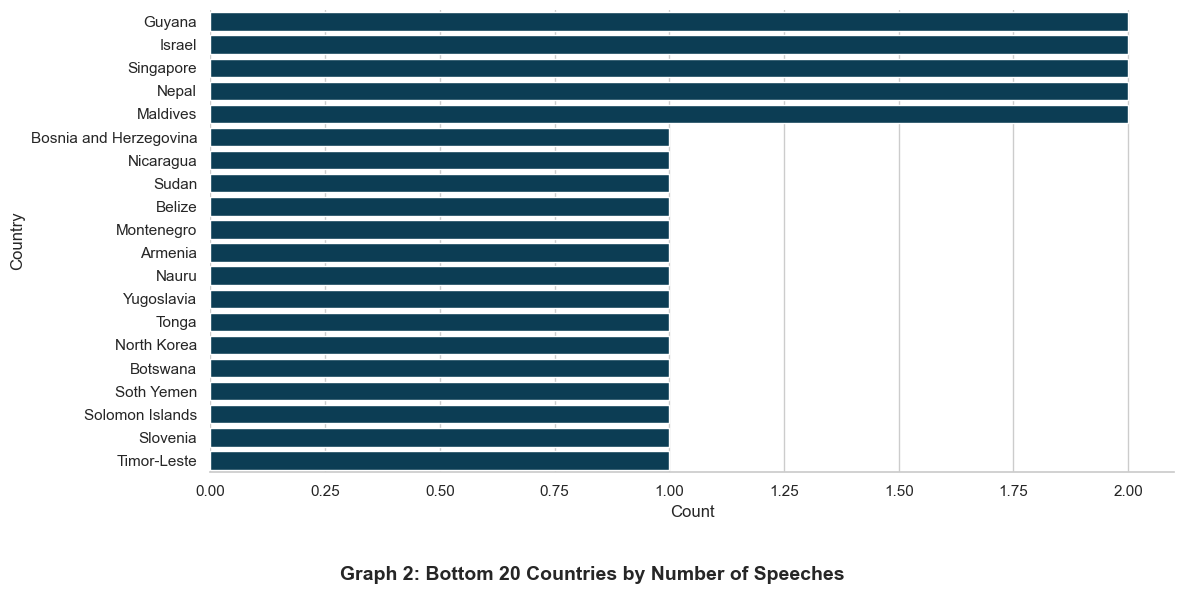

In [131]:
# Set Seaborn style
sns.set(style="whitegrid")

# Graph 1: Top 20 Countries by Frequency
top_countries = df_merged['country_name'].value_counts().nlargest(20)

country_security_status = (
    df_merged.groupby('country_name')['security_council_permanent']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 0)
    .reindex(top_countries.index)
)

# Assign colors: red if permanent member, blue otherwise
colors = ['#D95F02' if status == 1 else '#004260' for status in country_security_status]


plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)
plt.xlabel("Count")
plt.ylabel("Country")
sns.despine(left=True, right=True, top=True, bottom=False)
plt.tight_layout()
plt.subplots_adjust(bottom=0.20)  # shift everything up to make room for title
plt.figtext(0.5, 0.02, "Graph 1: Top 20 Countries by Number of Speeches", ha="center", fontsize=14, weight='bold')

plt.savefig(os.path.join(fig_dir, 'graph_1_top_20_countries_by_frequency.png'))
plt.show()

# Graph 2: Bottom 15 Countries by Frequency
bottom_countries = df_raw['country_name'].value_counts().nsmallest(20)
bottom_countries = bottom_countries.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, color='#004260')
plt.xlabel("Count")
plt.ylabel("Country")
sns.despine(left=True, right=True, top=True, bottom=False)
plt.tight_layout()
plt.subplots_adjust(bottom=0.20)
plt.figtext(0.5, 0.02, "Graph 2: Bottom 20 Countries by Number of Speeches", ha="center", fontsize=14, weight='bold')

plt.savefig(os.path.join(fig_dir, 'graph_2_bottom_20_countries_by_frequency.png'))
plt.show()

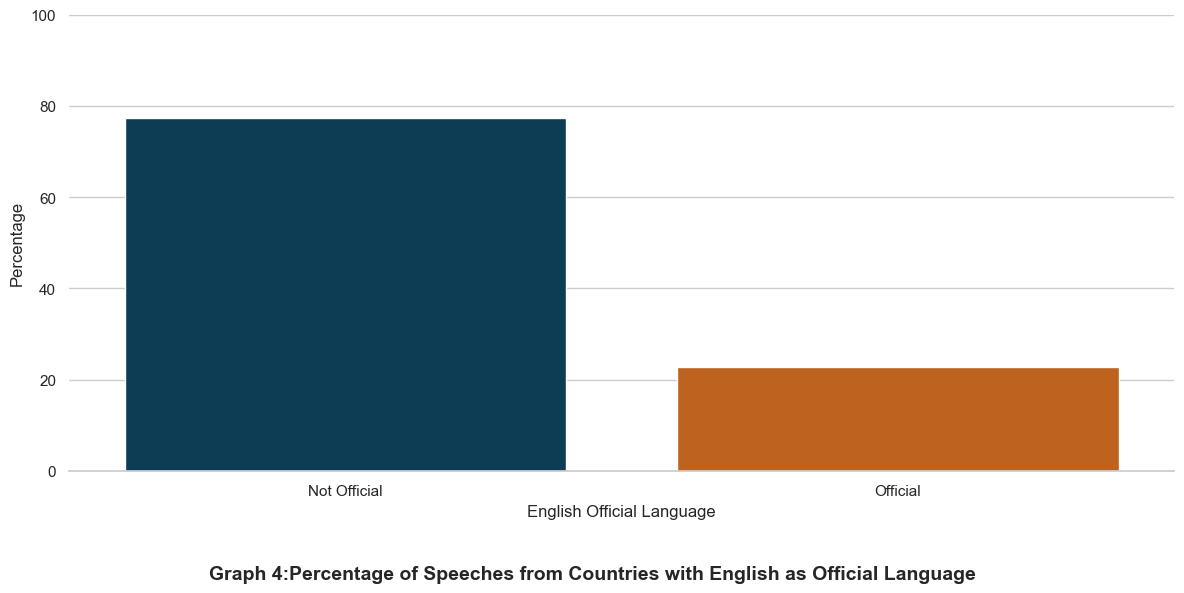

In [147]:
sns.set(style="whitegrid")

# Count and normalize to get percentages
eng_counts = df_merged['english_official_language'].value_counts(normalize=True).sort_index() * 100

# Define labels
eng_labels = ['Not Official', 'Official']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=eng_labels, y=eng_counts.values, palette=['#004260', '#D95F02'])

plt.ylabel("Percentage")
plt.xlabel("English Official Language")
plt.ylim(0, 100)  # Optional: force axis to max out at 100%

sns.despine(left=True, right=True, top=True, bottom=False)


plt.tight_layout()
plt.subplots_adjust(bottom=0.20)

# Footnote / Title
plt.figtext(0.5, 0.02, "Graph 4:Percentage of Speeches from Countries with English as Official Language", 
            ha="center", fontsize=14, weight='bold')

# Save
plt.savefig(os.path.join(fig_dir, 'english_official_language_percentage.png'))
plt.show()

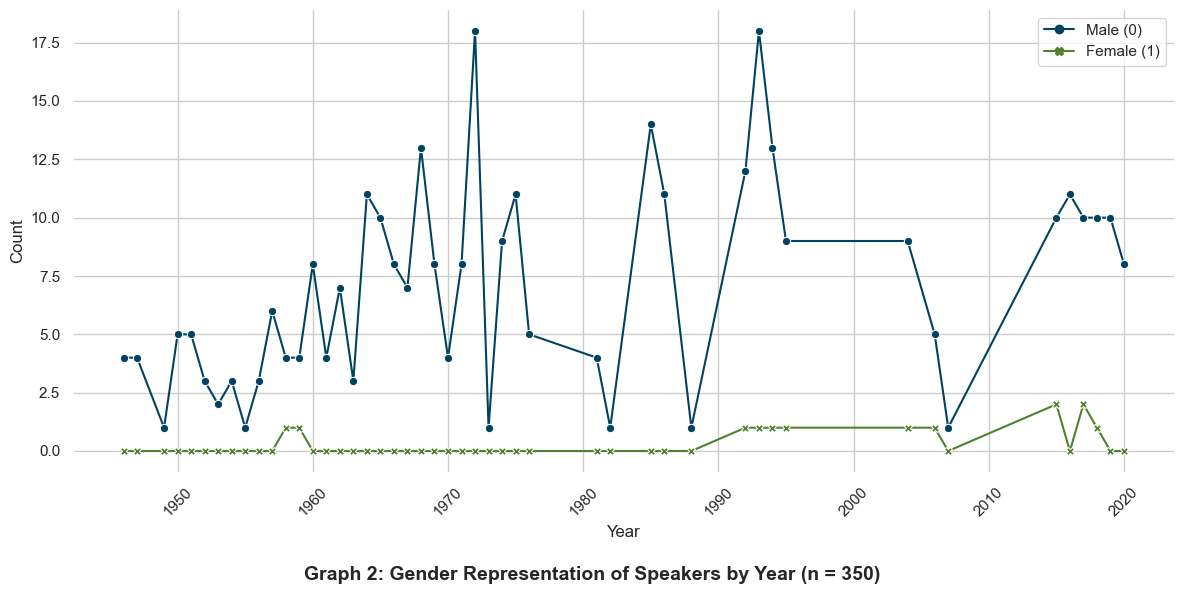

In [145]:
# Filter to only 0 and 1 (exclude NaNs)
df_gender = df_merged[df_merged['gender_dummy'].isin([0, 1])]

# Total valid entries (for n=)
total_n = len(df_gender)

# Group and count
gender_counts = df_gender.groupby(['year', 'gender_dummy']).size().unstack(fill_value=0).sort_index()
gender_counts.columns = ['Male (0)', 'Female (1)']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_counts, markers=True, dashes=False, palette=custom_colors[:2])

plt.xlabel("Year")
plt.ylabel("Count")
sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.20)

# Footnote
plt.figtext(0.5, 0.02, f"Graph 2: Gender Representation of Speakers by Year (n = {total_n})", 
            ha="center", fontsize=14, weight='bold')

# Save
plt.savefig(os.path.join(fig_dir, 'gender_dummy_by_year_linechart.png'))
plt.show()

<Figure size 1400x700 with 0 Axes>

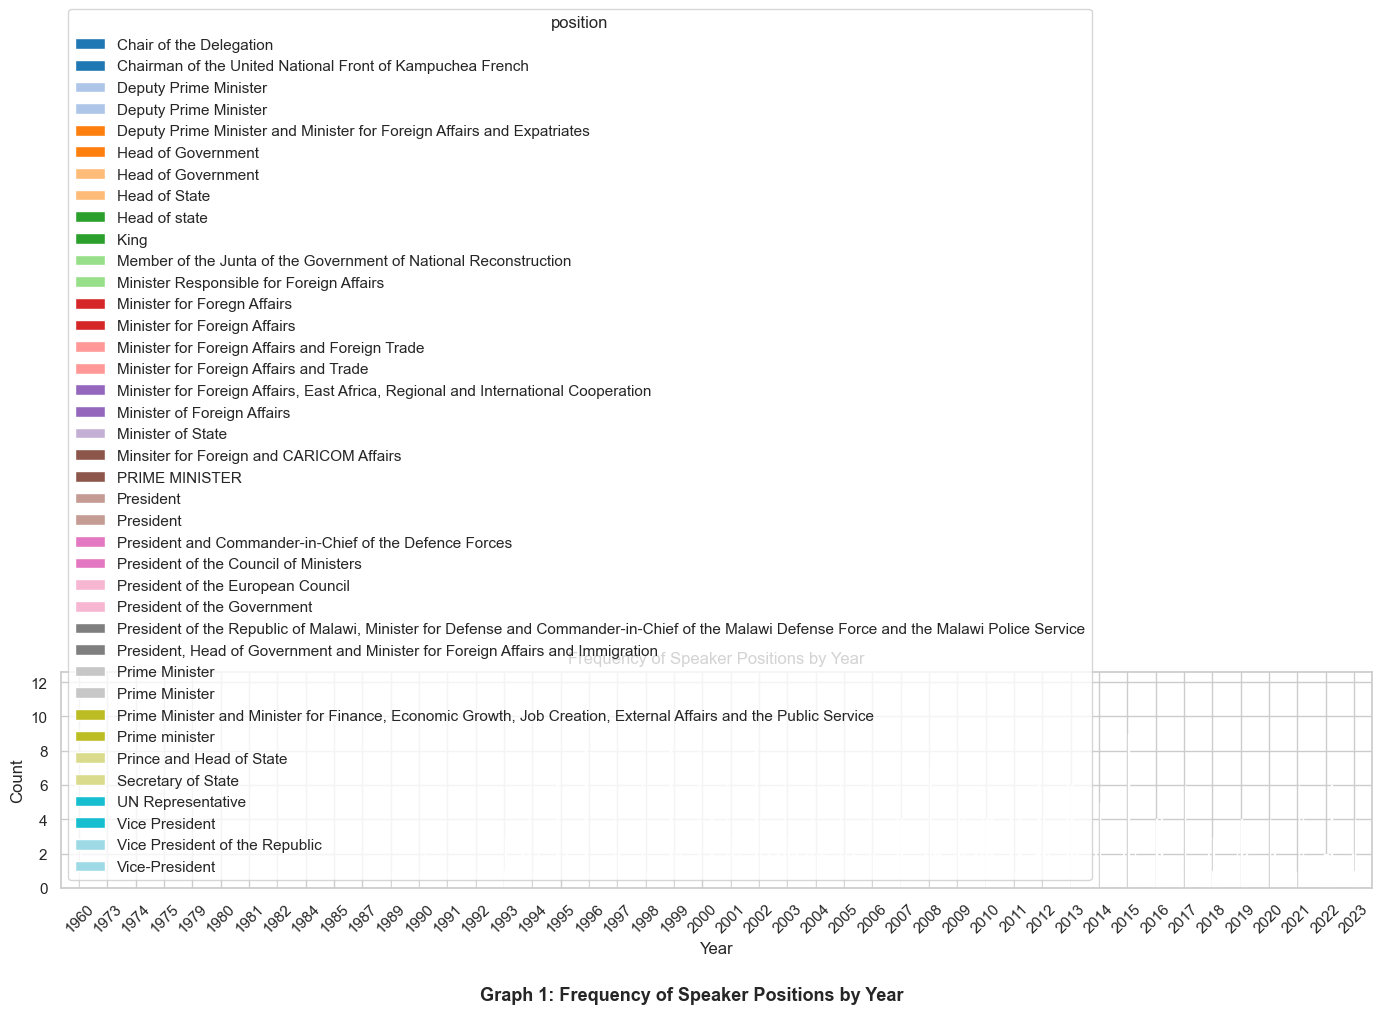

In [87]:
# == Graph 3: Frequency by speaker position per year ==

# Group and count frequency of each speaker position per year
position_counts = df_merged.groupby(['year', 'position']).size().unstack(fill_value=0).sort_index()

# Plot
plt.figure(figsize=(14, 7))
position_counts.plot(kind='bar', stacked=False, width=0.8, colormap='tab20', figsize=(14, 7))

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Frequency of Speaker Positions by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.20)

# Add footnote
plt.figtext(0.5, 0.02, "Graph 1: Frequency of Speaker Positions by Year", ha="center", fontsize=14, weight='bold')

# Save figure
plt.savefig(os.path.join(fig_dir, 'speaker_positions_by_year.png'))
plt.show()


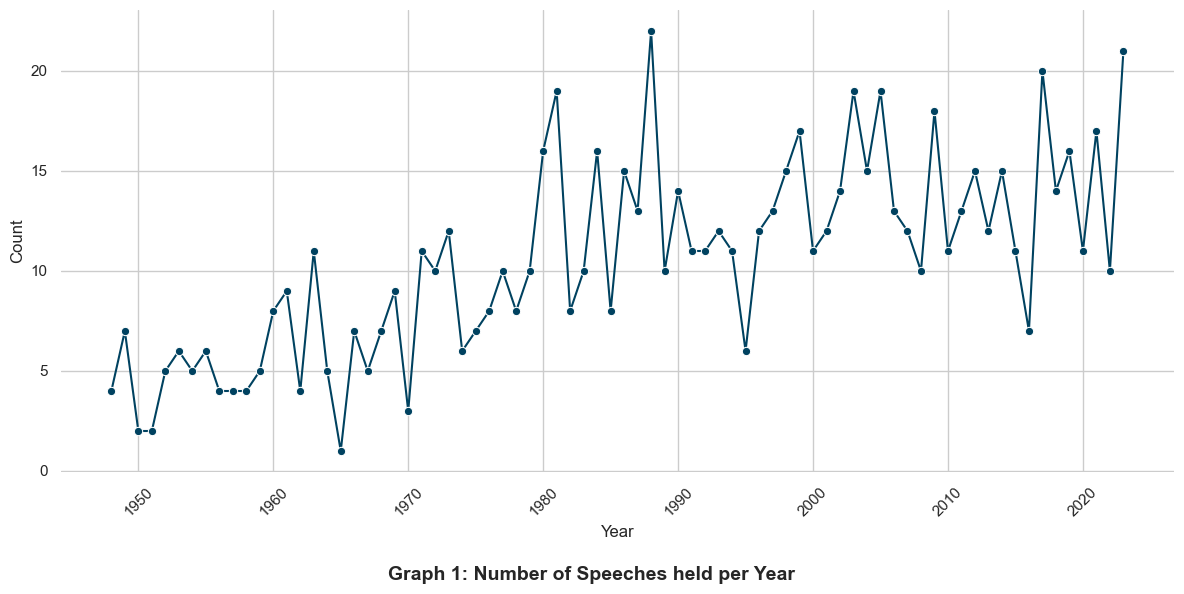

In [143]:
# == Graph 3: Quantity of speeches by year ==
year_counts = df_raw['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='#004260')
plt.xlabel("Year")
plt.ylabel("Count")
sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.20)
plt.figtext(0.5, 0.02, "Graph 1: Number of Speeches held per Year", ha="center", fontsize=14, weight='bold')

plt.savefig(os.path.join(fig_dir, 'entries_by_year.png'))
plt.show()

### Wordcloud with the most common words

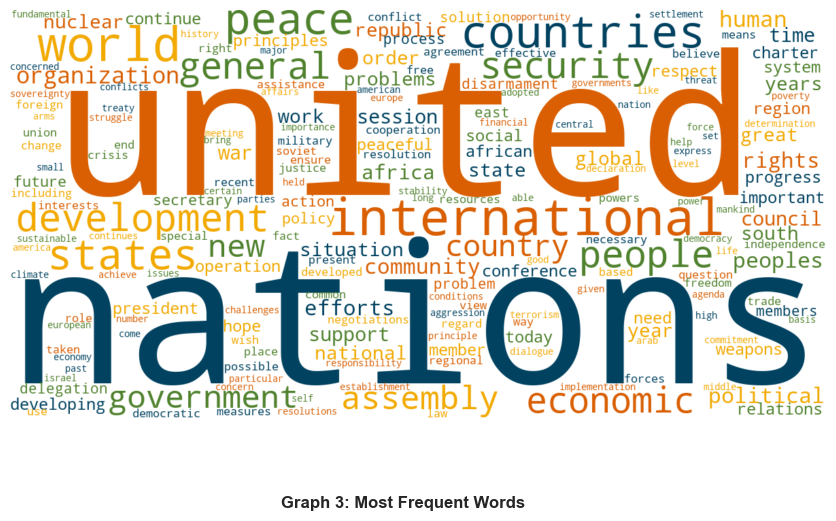

In [123]:
# == Graph 4: Most Frequent Words ==

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap=custom_cmap,
    max_words=200,
    contour_color='steelblue',
    contour_width=2,
    prefer_horizontal=1.0,
    margin=0
).generate_from_frequencies(word_counts_wordcloud)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplots_adjust(bottom=0.20)  # Create space at bottom
plt.figtext(0.5, 0.05, "Graph 3: Most Frequent Words", ha='center', fontsize=12, weight='bold')

plt.savefig(os.path.join(fig_dir, 'most_frequent_words.png'), bbox_inches='tight', pad_inches=0)
plt.show()


In [174]:
affect_out_path = os.path.join(data_freq, "affect_words.txt")
cog_out_path = os.path.join(data_freq, "cog_words.txt")

def load_words(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    tokens = content.strip().split()
    words = tokens[::2]
    counts = tokens[1::2]
    counts = [int(c.strip('(),')) for c in counts]
    df = pd.DataFrame({'word': words, 'count': counts})
    return df

# Load top 10 words from each dictionary
affect_df = load_words(affect_out_path).nlargest(10, 'count').reset_index(drop=True)
cog_df = load_words(cog_out_path).nlargest(10, 'count').reset_index(drop=True)

# Pad the smaller dataframe if needed (in case counts differ)
max_len = max(len(affect_df), len(cog_df))
affect_df = affect_df.reindex(range(max_len))
cog_df = cog_df.reindex(range(max_len))

# Combine into one dataframe with 4 columns
combined_df = pd.DataFrame({
    'Affect Dictionary': affect_df['word'],
    'Frequency ': affect_df['count'],
    'Cognition Dictionary': cog_df['word'],
    'Frequency': cog_df['count']
})

fig_plot, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=combined_df.fillna('').values,
                 colLabels=combined_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Add caption below the table
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.get_text().set_weight('bold')
plt.subplots_adjust(bottom=0.2)  # make space at the bottom
fig_plot.text(0.5, 0.05, 'Table 1: Highest frequencies from affection and cognition dictionaries', 
         ha='center', fontsize=14, weight='bold')

plt.tight_layout(rect=[0, 0.1, 1, 1])  # leave bottom margin for caption
plt.savefig(os.path.join(fig_dir, 'top10_affect_cognition_combined.png'))

plt.close()
